<h1>1. Introduction</h1>
<br>
This notebook will be an analysis of Warzone in Call of Duty.
<br>
After each game I record the center of the first circle, the flight path, where we dropped, and what place we came in.
I will use these variables to try to find the optimal place to drop, given the flight path and center of the first circle. The stats I record are used with the same group of people. I personally am in every game I record, the duos and trios consist of a subset of the people from quads.

Shout out to <i>mfultzy MoKillZ69 </i> and <i>JTooFly24</i>

<h3>2.1 Import Data</h3>
<br>
The Warzone map has latitude coordinates A-J and longitude coordinates 0-9. When recording the data I changed each letter to the following numbers:
<br>
A: 0<br>
B: 1<br>
C: 2<br>
D: 3<br>
E: 4<br>
F: 5<br>
G: 6<br>
H: 7<br>
I: 8<br>
J: 9<br>
K: 10<br>
<br>
You may have noticed I have added a tenth letter K. This is because there are actually 10 lines on the warzone map if you include the borders. So the map is a 10x10 grid and thats how I calculate the coordinates for each location. All coordinate values are estimates and by no means perfectly accurate. They are all eyeballed. After importing the data I calculate both the distance between our drop location and the flight path, and our drop location and the center of the circle. Formulas found <a href="https://stackoverflow.com/questions/39840030/distance-between-point-and-a-line-from-two-points">here</a> and <a href="https://stackoverflow.com/questions/5228383/how-do-i-find-the-distance-between-two-points">here</a>.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warzone_config as wc
from IPython.display import Markdown as md


warzone = wc.read_warzone('Warzone.csv')

# add distance columns
warzone['drop_plane_dist'] = wc.create_distance_from_plane_col(warzone)
warzone['drop_center_dist'] = wc.create_distance_from_center_col(warzone)
warzone['combined_dist'] = warzone['drop_plane_dist'] + warzone['drop_center_dist']

warzone.head()

date  circle_middle_lat  circle_middle_lon  drop_location_lat  \
0 2020-05-24               6.50                5.0                4.0   
1 2020-05-24               7.50                4.5                5.0   
2 2020-05-24               2.00                6.5                5.0   
3 2020-05-25               5.75                7.5                8.0   
4 2020-05-25               2.50                6.0                7.0   

   drop_location_lon  plane_start_lat  plane_start_lon  plane_end_lat  \
0                8.0              6.5              0.0           2.75   
1                6.5              2.5              0.0           9.50   
2                6.4              3.0              0.0           6.00   
3                8.5              0.0              7.5          10.00   
4                3.0              0.0              9.0           5.50   

   plane_end_lon  place  team_num drop_area  season  drop_plane_dist  \
0           10.0      9         3     hills       3         0.468165   
1           10.0     14         3  hospital       3         1.679425   
2           10.0      2         3  hospital       3         0.076626   
3            5.5     16         3    prison       3         2.549510   
4            0.0     11         4     quary       3         2.844273   

   drop_center_dist  combined_dist  
0          3.905125       4.373289  
1          3.201562       4.880988  
2          3.001666       3.078292  
3          2.462214       5.011724  
4          5.408327       8.252600

<h3>2.2 Analysis</h3>

Season 3 average: 12.16
Season 4 average: 17.7
Season 5 average: 21.0

Duos Average: 22.19
Trios Average: 16.43
Quads Average: 12.83

Overall our Average is: 17.0


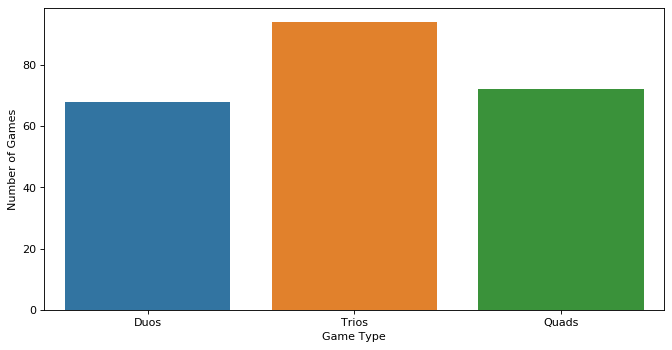

In [2]:
means_by_game_type = warzone.groupby("team_num").mean()["place"]

duos_mean = str(round(means_by_game_type.iloc[0], 2))
trios_mean = str(round(means_by_game_type.iloc[1], 2))
quads_mean = str(round(means_by_game_type.iloc[2], 2))
season_average_string = wc.get_season_averages(warzone)
overall_mean = round(warzone.place.mean(), 2)

wc.plot_gametypes_by_number(warzone)

wc.print_average_places(duos_mean, trios_mean, quads_mean, season_average_string, overall_mean)

The average for the places we have been to so far:
storage: 5.0
military base: 9.0
promenade east: 10.36
hospital: 12.82
dam: 13.0
port: 13.5
boneyard: 13.86
hills: 14.3
prison: 15.43
downtown: 16.64
tv station: 17.0
promenade west: 17.08
farmland: 17.75
train station: 18.29
quary: 18.67
no name: 19.53
airport: 21.5
lumber: 23.0
superstore: 39.0
stadium: 65.0



<Figure size 432x288 with 0 Axes>

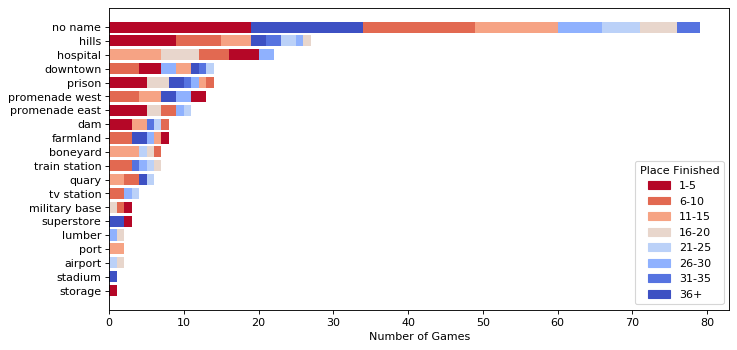

In [3]:
drop_location_groups = warzone.groupby('drop_area')
drop_location_average_finish = drop_location_groups.mean()['place'].sort_values().round(2)
wc.display_placement_by_drop_location_chart(warzone)
wc.print_drop_locations_averages(drop_location_average_finish)

Heatmap of the frequency of places we dropped at.

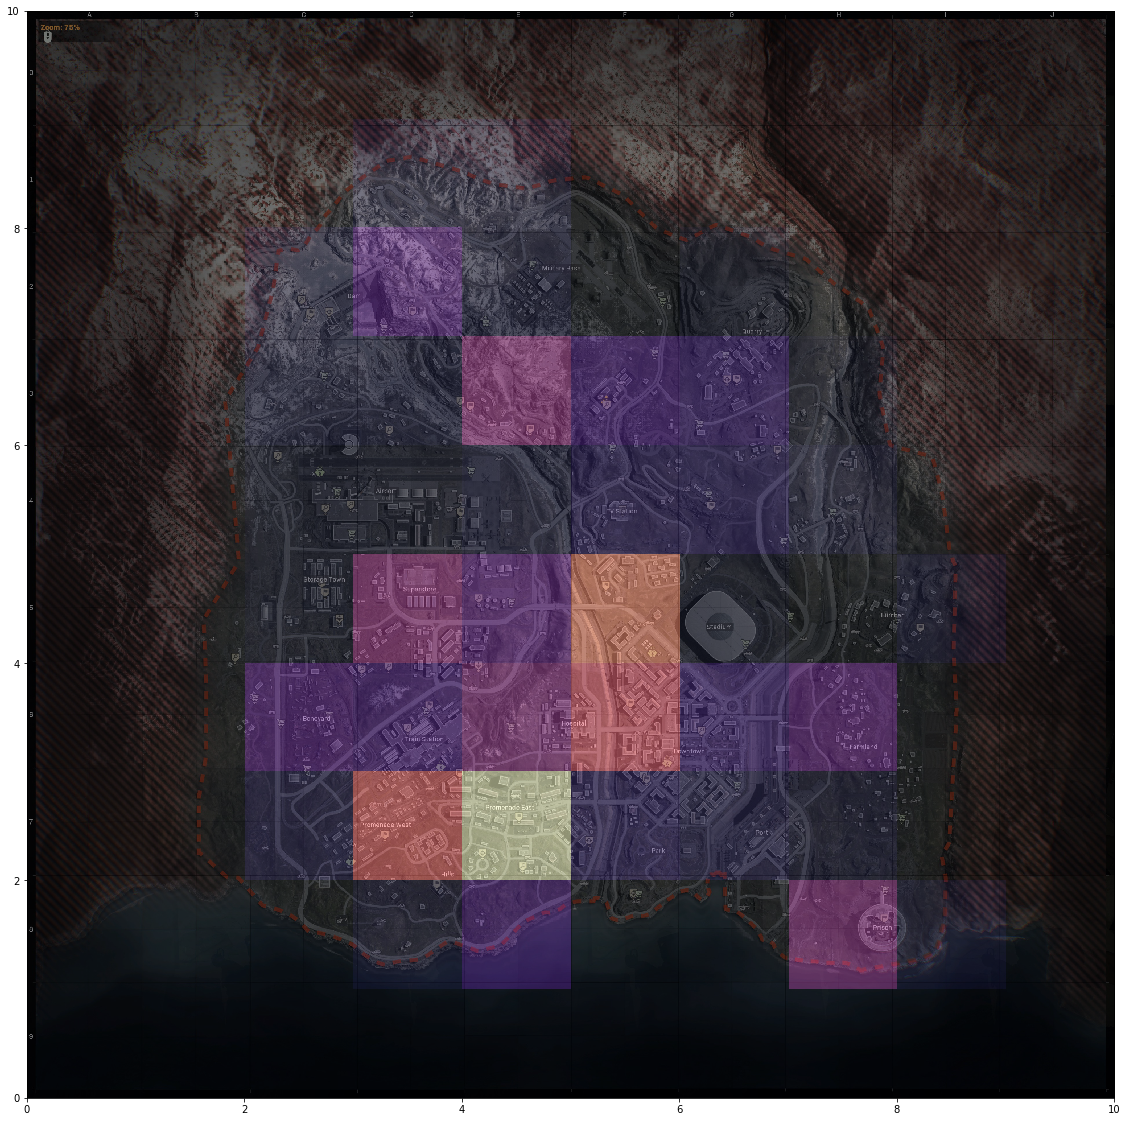

In [4]:
wc.plot_drop_location_heatmap(warzone)

The correlation between the distance from drop location to plane and place is: 3.41%
The correlation between the distance from drop location to the center ofthe circle and place is:8.04%
So far not really any correlation between thesevalues. Let's try taking the correlationbetween both distances and how well we did.


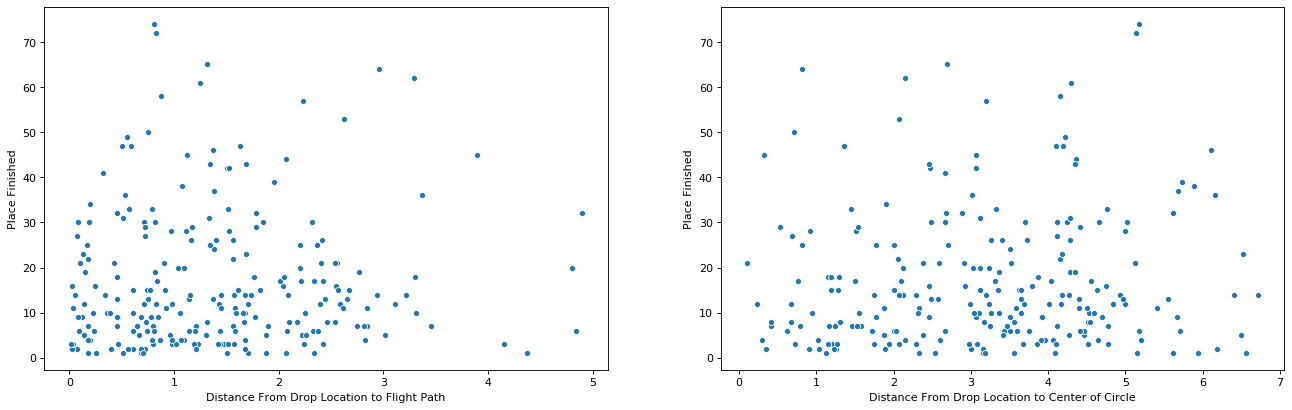

In [5]:
place_plane_corr = wc.get_corr(warzone, 'place', 'drop_plane_dist')
place_center_corr = wc.get_corr(warzone, 'place', 'drop_center_dist')
place_plane_corr_form = (place_plane_corr.round(4) + 0.0001) * 100
place_center_corr_form = (place_center_corr.round(4) + .0001) * 100

wc.plot_distance_scatters(warzone)

wc.print_distance_correlation_string(place_plane_corr, place_center_corr)   

The size of the circles represent how badly we did.
As in the bigger the circle the worse we did. And as you can seethere seems be no correlation between placement and both distances,the value being: -0.12%
 Lets try summing the distances and takingthat correlation.


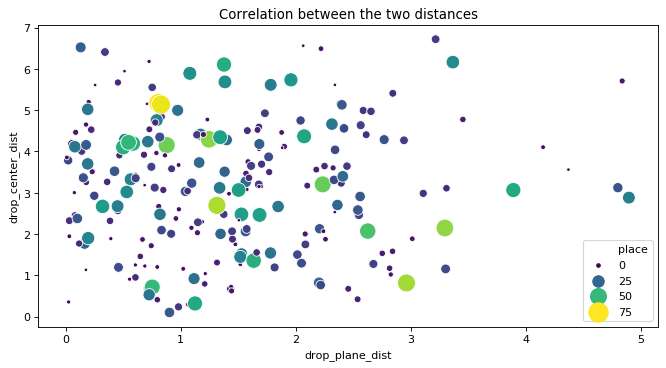

In [6]:
plane_center_corr = wc.get_corr(warzone, 'drop_center_dist', 'drop_plane_dist')
corr_between_place_both_dists = wc.get_multi_corr(len(warzone), place_plane_corr, place_center_corr, plane_center_corr)

wc.plot_correlation_both_dist_and_place(warzone)

wc.print_correlation_both_dist_and_place(corr_between_place_both_dists)

This time the correlation between combined distances and place is 8.47%
So once again very little correlation, we will have to collect more data, to see if this changes.


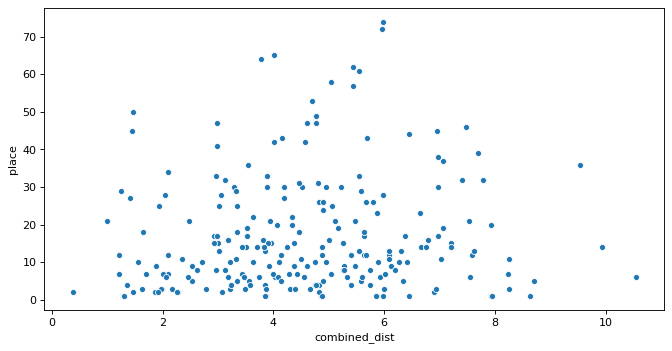

In [7]:
combined_dist_corr = warzone['place'].corr(warzone['combined_dist'])

fig, ax = plt.subplots(figsize=(10,5), dpi=80)
sns.scatterplot(data=warzone, x='combined_dist', y='place', s=30)

wc.print_combined_dist_string(combined_dist_corr)

Map showing each time we came in first.


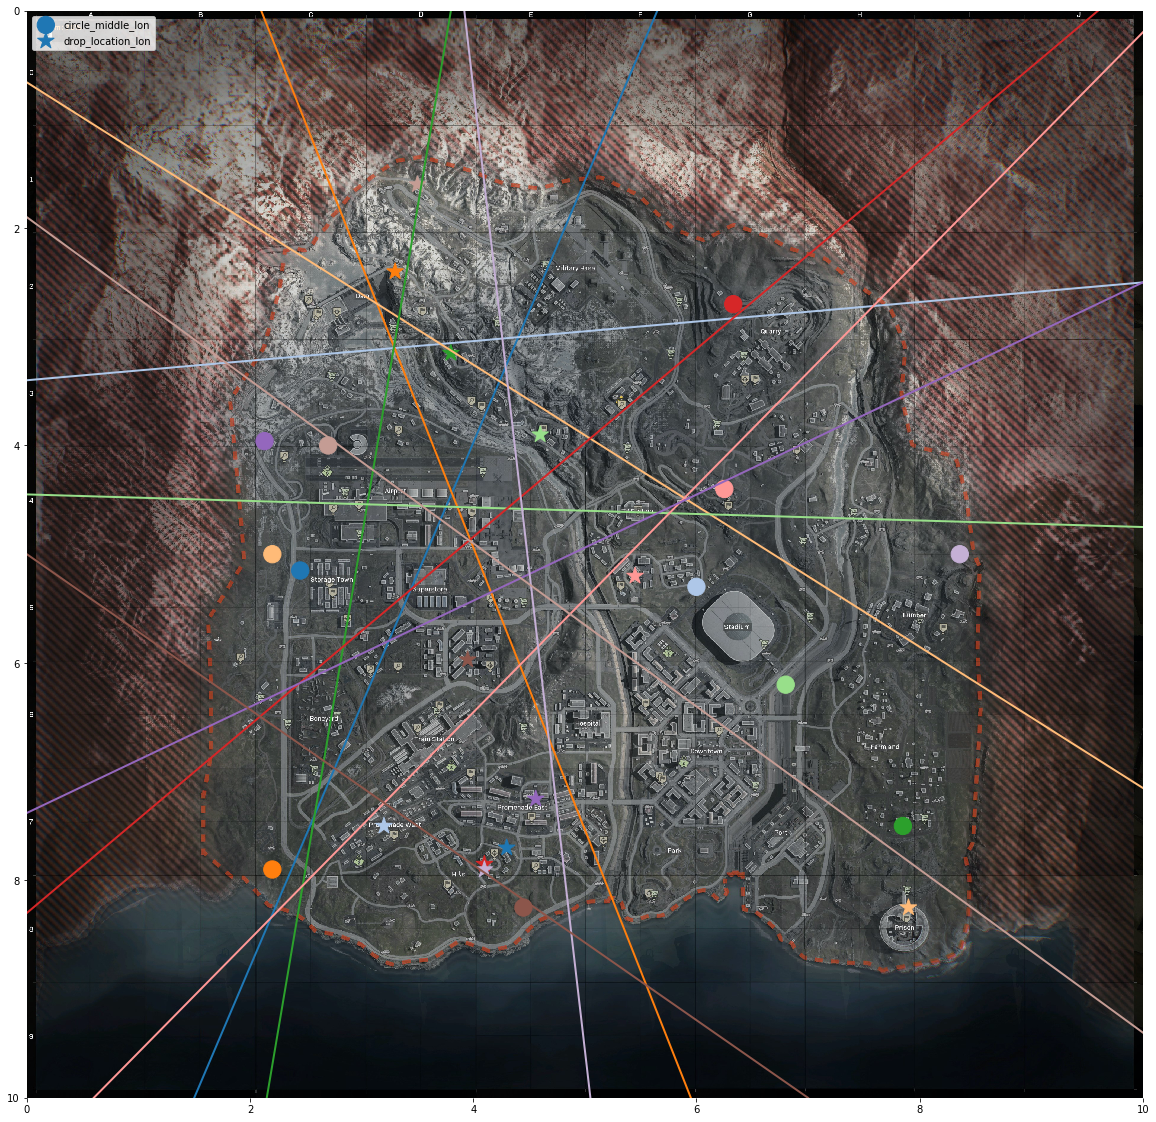

In [8]:
wc.plot_first_place_finishes(warzone)
print("Map showing each time we came in first.")

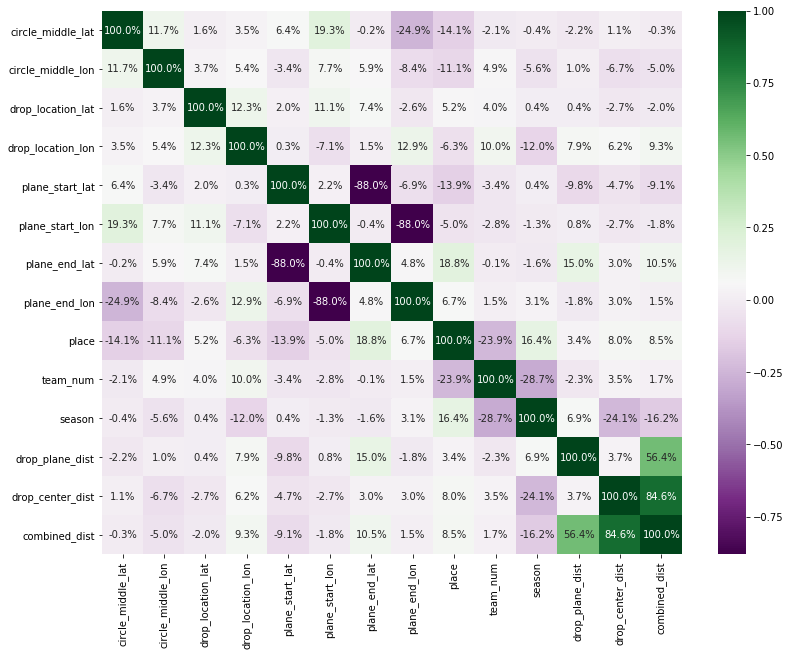

In [9]:
fig, ax = plt.subplots(figsize=(13,10))
sns.heatmap(warzone.corr(), annot=True, cmap="PRGn", fmt='.1%')

<h2>3. Model Selection</h2>

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

warzone_ml = warzone.drop(columns=["date", "drop_area", "drop_plane_dist", "drop_location_lat", "drop_location_lon", "season"])

train_set, test_set = train_test_split(warzone_ml, random_state=42)

train = train_set.drop("place", axis=1)
labels = train_set["place"].copy()

In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression

pipe = Pipeline([('std_scaler', StandardScaler())])

train_scaled = pipe.fit_transform(train)

rf = RandomForestRegressor(n_estimators=7)
svr = SVR(kernel="sigmoid", gamma="auto")
lr = LinearRegression()

svr.fit(train_scaled, labels)
rf.fit(train_scaled, labels)
lr.fit(train_scaled, labels)

svr_scores = cross_val_score(svr, train_scaled, labels, cv=5, scoring="neg_mean_absolute_error")
rf_scores = cross_val_score(rf, train_scaled, labels, cv=5, scoring="neg_mean_absolute_error")
lr_scores = cross_val_score(lr, train_scaled, labels, cv=5, scoring="neg_mean_absolute_error")

print("SVR mean score: {}".format(svr_scores.mean()))
print("RF mean score: {}".format(rf_scores.mean()))
print("LR mean score: {}".format(lr_scores.mean()))

SVR mean score: -11.103857413190832
RF mean score: -13.116734693877552
LR mean score: -11.4915011396531


In [12]:
from sklearn.model_selection import GridSearchCV

rf_params = [
    {"n_estimators": [1,2,3,4,5,6,7,8,9,10,20], "max_features": [1,2,3,4,5,None], "max_depth":[1,2,3,4,5,None]}
]

svr_params = [
    {"kernel": ["linear", "poly", "rbf", "sigmoid"], "C": [.001, .01, .1, 1, 10, 100], "gamma": ["scale", "auto"], "degree": [1,2,3,4]}
]

svr_grid = GridSearchCV(svr, svr_params, cv=5, scoring="neg_mean_absolute_error")
rf_grid = GridSearchCV(rf, rf_params, cv=5, scoring="neg_mean_absolute_error")

svr_grid.fit(train_scaled, labels)
rf_grid.fit(train, labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=7, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'max_depth': [1, 2, 3, 4, 5, None],

In [13]:
print(svr_grid.predict(test_set.drop("place", axis=1)))
test_set

[12.57588178  5.14131973  4.84308502  7.15184381  8.33686831  4.26571636
  6.47270557 10.5582268   4.58076917  8.51272362  8.63398234  8.83615762
  3.47436155  5.52036163  6.35705904  4.10363785 10.55301682  2.62184447
  6.67734675 13.09296508  5.51845556  3.72277058  4.99530981  8.97737521
  8.74311855  7.84726847  9.22075709  5.73662737  9.03477139  1.31536111
  5.82077081  9.6838268   5.72478164 11.01458707  9.86652959  8.8364098
  8.26085547  7.42486296  7.66294113  6.38230126  8.57056256  5.72976328
 13.24396775  6.38058778  1.0197111  10.13945189  4.43952777  1.73784094
  7.20323855  3.59922977  6.9490058   7.78502043  3.14600609  6.10026865
  3.879084   10.55059598  8.98387424  8.02292268  5.02216966]


circle_middle_lat  circle_middle_lon  plane_start_lat  plane_start_lon  \
69                2.80               5.20             8.90            10.00   
206               2.60               8.00             0.00             3.00   
180               3.65               2.80             0.00             0.30   
9                 5.75               4.75            10.00             8.75   
127               3.80               6.25             0.00             9.60   
109               7.35               7.75             1.90             0.00   
196               2.75               2.75             0.00             1.60   
93                3.20               8.00             5.00            10.00   
213               7.00               6.00            10.00             9.10   
15                5.75               8.00             1.75            10.00   
224               4.10               6.15             0.00             0.36   
55                8.40               4.55             7.20            10.00   
227               8.00               6.30            10.00             9.75   
30                3.70               7.40             0.00             7.40   
201               8.40               5.00            10.00             3.75   
147               5.60               2.20             0.00             0.25   
19                4.75               3.50             5.50            10.00   
112               6.00               6.75            10.00             4.90   
225               7.60               3.50             1.80            10.00   
24                5.50               7.85            10.00            10.00   
208               1.85               6.70             6.50             0.00   
10                2.00               7.00             0.00             7.75   
95                3.60               4.40            10.00             3.08   
144               4.20               5.15             3.96            10.00   
220               5.55               2.55             2.90            10.00   
25                7.50               5.25            10.00             4.90   
86                7.90               5.60             5.75            10.00   
183               3.40               8.40             6.40             0.00   
84                8.05               4.90            10.00             4.75   
18                6.25               4.75             1.00             0.00   
146               2.30               5.90             0.40             0.00   
66                7.15               8.15             7.75            10.00   
45                2.00               7.75             1.70             0.00   
139               8.30               8.25             0.75            10.00   
125               6.25               2.15            10.00             7.75   
170               6.40               4.30            10.00             9.97   
164               7.90               5.00            10.00             6.00   
16                2.50               3.75             0.00             7.85   
156               3.10               7.25            10.00             8.10   
177               5.55               4.00            10.00             2.98   
161               6.70               6.90             4.90            10.00   
203               2.04               6.85             2.60             0.00   
124               7.50               4.90             9.20            10.00   
60                2.50               5.70            10.00             6.85   
199               8.36               5.00             3.92             0.00   
229               2.10               3.60             7.47             0.00   
82                2.80               4.76             0.00             3.15   
117               5.40               6.15             0.00             5.00   
155               2.25               6.75             3.90            10.00   
148               3.40               7.70            10